# Exploration of the dataset

In [1]:
# Load libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv("profiles.csv")

In [3]:
# Analyze numeric repartition
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


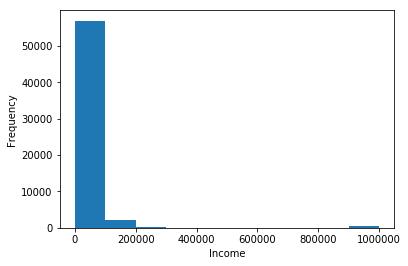

In [4]:
# Graph height repartition
plt.hist(df.income, bins=10)
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

In [5]:
# Analyse column repartition
#zzz = df.location.map(lambda location: location.split(',')[1])
#print (zzz.value_counts())
#print (len(zzz.unique()))
languages = ['afrikaans', 'albanian', 'ancient greek', 'arabic', 'armenian', 'basque', 'belarusan', 'bengali', 'breton', 'bulgarian', 'c++', 'catalan', 'cebuano', 'chechen', 'chinese', 'croatian', 'czech', 'danish', 'dutch', 'english', 'esperanto', 'estonian', 'farsi', 'finnish', 'french', 'frisian', 'georgian', 'german', 'greek', 'gujarati', 'hawaiian', 'hebrew', 'hindi', 'hungarian', 'icelandic', 'ilongo', 'indonesian', 'irish', 'italian', 'japanese', 'khmer', 'korean', 'latin', 'latvian', 'lisp', 'lithuanian', 'malay', 'maori', 'mongolian', 'norwegian', 'occitan', 'other', 'persian', 'polish', 'portuguese', 'romanian', 'rotuman', 'russian', 'sanskrit', 'sardinian', 'serbian', 'sign language', 'slovak', 'slovenian', 'spanish', 'swahili', 'swedish', 'tagalog', 'tamil', 'thai', 'tibetan', 'turkish', 'ukrainian', 'urdu', 'vietnamese', 'welsh', 'yiddish']

print(df.income.value_counts())
print(len(df.income))

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64
59946


# First question

We do notice a large number of not assigned "income" value
We can consider income is correlated with age & occupation & education

We do not consider features such as ethnicity, sex as it might enforce stereotypes (such as racial and gender biases).

We will need to study those correlations

In [8]:
# Education level from (from "-1" (student) to "10" (med school graduate)) 
mapping_education = {
    'working on college/university': -1.,
    'working on space camp': -1.,
    'working on two-year college': -1.,
    'working on masters program': -1.,
    'working on ph.d program': -1., 
    'working on med school': -1.,
    'working on high school': -1.,
    'working on law school': -1.,
    'graduated from high school': 0.,
    'graduated from two-year college': 2.,
    'graduated from college/university': 4., 
    'graduated from masters program': 6.,
    'graduated from ph.d program': 10.,
    'graduated from law school': 10.,
    'graduated from med school': 10.,
    'graduated from space camp': 10.,
    'dropped out of high school': -1.,
    'dropped out of two-year college': 0.,
    'dropped out of college/university': 2.,
    'dropped out of masters program': 4.,
    'dropped out of ph.d program': 6.,
    'dropped out of med school': 6.,
    'dropped out of law school': 6.,
    'dropped out of space camp': 6.,
    'high school': 0.,
    'two-year college': 2.,
    'college/university': 4.,
    'masters program': 6.,
    'ph.d program': 10.,
    'med school': 10.,
    'law school': 10.,
    'space camp': 10.
}

mapping_drinks = {
    'not at all': 0.,
    'rarely': 1.,
    'socially': 2.,
    'often': 3.,
    'very often': 4.,
    'desperately': 5.
}

mapping_drugs = {
    'never': 0.,
    'sometimes': 1.,
    'often': 2.
}

mapping_smokes = {
    'no': 0.,
    'trying to quit': 0.5,
    'when drinking': 1., 
    'yes': 1.
}

mapping_status = {
    'single': 0.,
    'available': 0.,
    'seeing someone': 1.,
    'married': 1.
}

def get_matching_gender(row):
    if (row.sex == 'm') & (row.orientation == 'straight'): return 0.
    elif (row.sex == 'm') & (row.orientation == 'bisexual'): return .5
    elif (row.sex == 'm') & (row.orientation == 'gay'): return 1.
    elif (row.sex == 'f') & (row.orientation == 'straight'): return 1.
    elif (row.sex == 'f') & (row.orientation == 'bisexual'): return .5
    elif (row.sex == 'f') & (row.orientation == 'gay'): return 0.

def get_speak(row):
    return len(str(row.speaks).split(','))

def get_pet_preference(pet):
    def find_preference(row):
        pets = str(row.pets)
        for preference in pets.split('and'):
            if pet in preference:
                if "dislikes" in pets:
                    return -1.
                if "likes" in pets:
                    return 1.
                if "has" in pets:
                    return 1.
        return 0.
    return find_preference

def get_language_level(language):
    def find_level(row):
        speak = str(row.speaks)
        for level in speak.split(','):
            if language in level:
                if "poorly" in speak:
                    return 0.5
                if "okay" in speak:
                    return 1.
                if "fluently" in speak:
                    return 1.5
                return 1
        return 0.
    return find_level

languages = ['afrikaans', 'albanian', 'ancient greek', 'arabic', 'armenian', 'basque', 'belarusan', 'bengali', 'breton', 'bulgarian', 'c++', 'catalan', 'cebuano', 'chechen', 'chinese', 'croatian', 'czech', 'danish', 'dutch', 'english', 'esperanto', 'estonian', 'farsi', 'finnish', 'french', 'frisian', 'georgian', 'german', 'greek', 'gujarati', 'hawaiian', 'hebrew', 'hindi', 'hungarian', 'icelandic', 'ilongo', 'indonesian', 'irish', 'italian', 'japanese', 'khmer', 'korean', 'latin', 'latvian', 'lisp', 'lithuanian', 'malay', 'maori', 'mongolian', 'norwegian', 'occitan', 'other', 'persian', 'polish', 'portuguese', 'romanian', 'rotuman', 'russian', 'sanskrit', 'sardinian', 'serbian', 'sign language', 'slovak', 'slovenian', 'spanish', 'swahili', 'swedish', 'tagalog', 'tamil', 'thai', 'tibetan', 'turkish', 'ukrainian', 'urdu', 'vietnamese', 'welsh', 'yiddish']

for language in languages:
    df[language + '_code'] = df.apply(get_language_level(language), axis=1)

income_bin = 20000

df['income_code'] = df.income // income_bin
df['dog_code'] = df.apply(get_pet_preference('dogs'), axis=1)
df['cat_code'] = df.apply(get_pet_preference('cats'), axis=1)
df["gender_code"] = df.apply(get_matching_gender, axis=1)
df["status_code"] = df.status.map(mapping_status)
df["speaks_len"] = df.apply(get_speak, axis=1)
df["drugs_code"] = df.drugs.map(mapping_drugs)
df["drinks_code"] = df.drinks.map(mapping_drinks)
df["smokes_code"] = df.smokes.map(mapping_smokes)
df["education_code"] = df.education.map(mapping_education)

36238


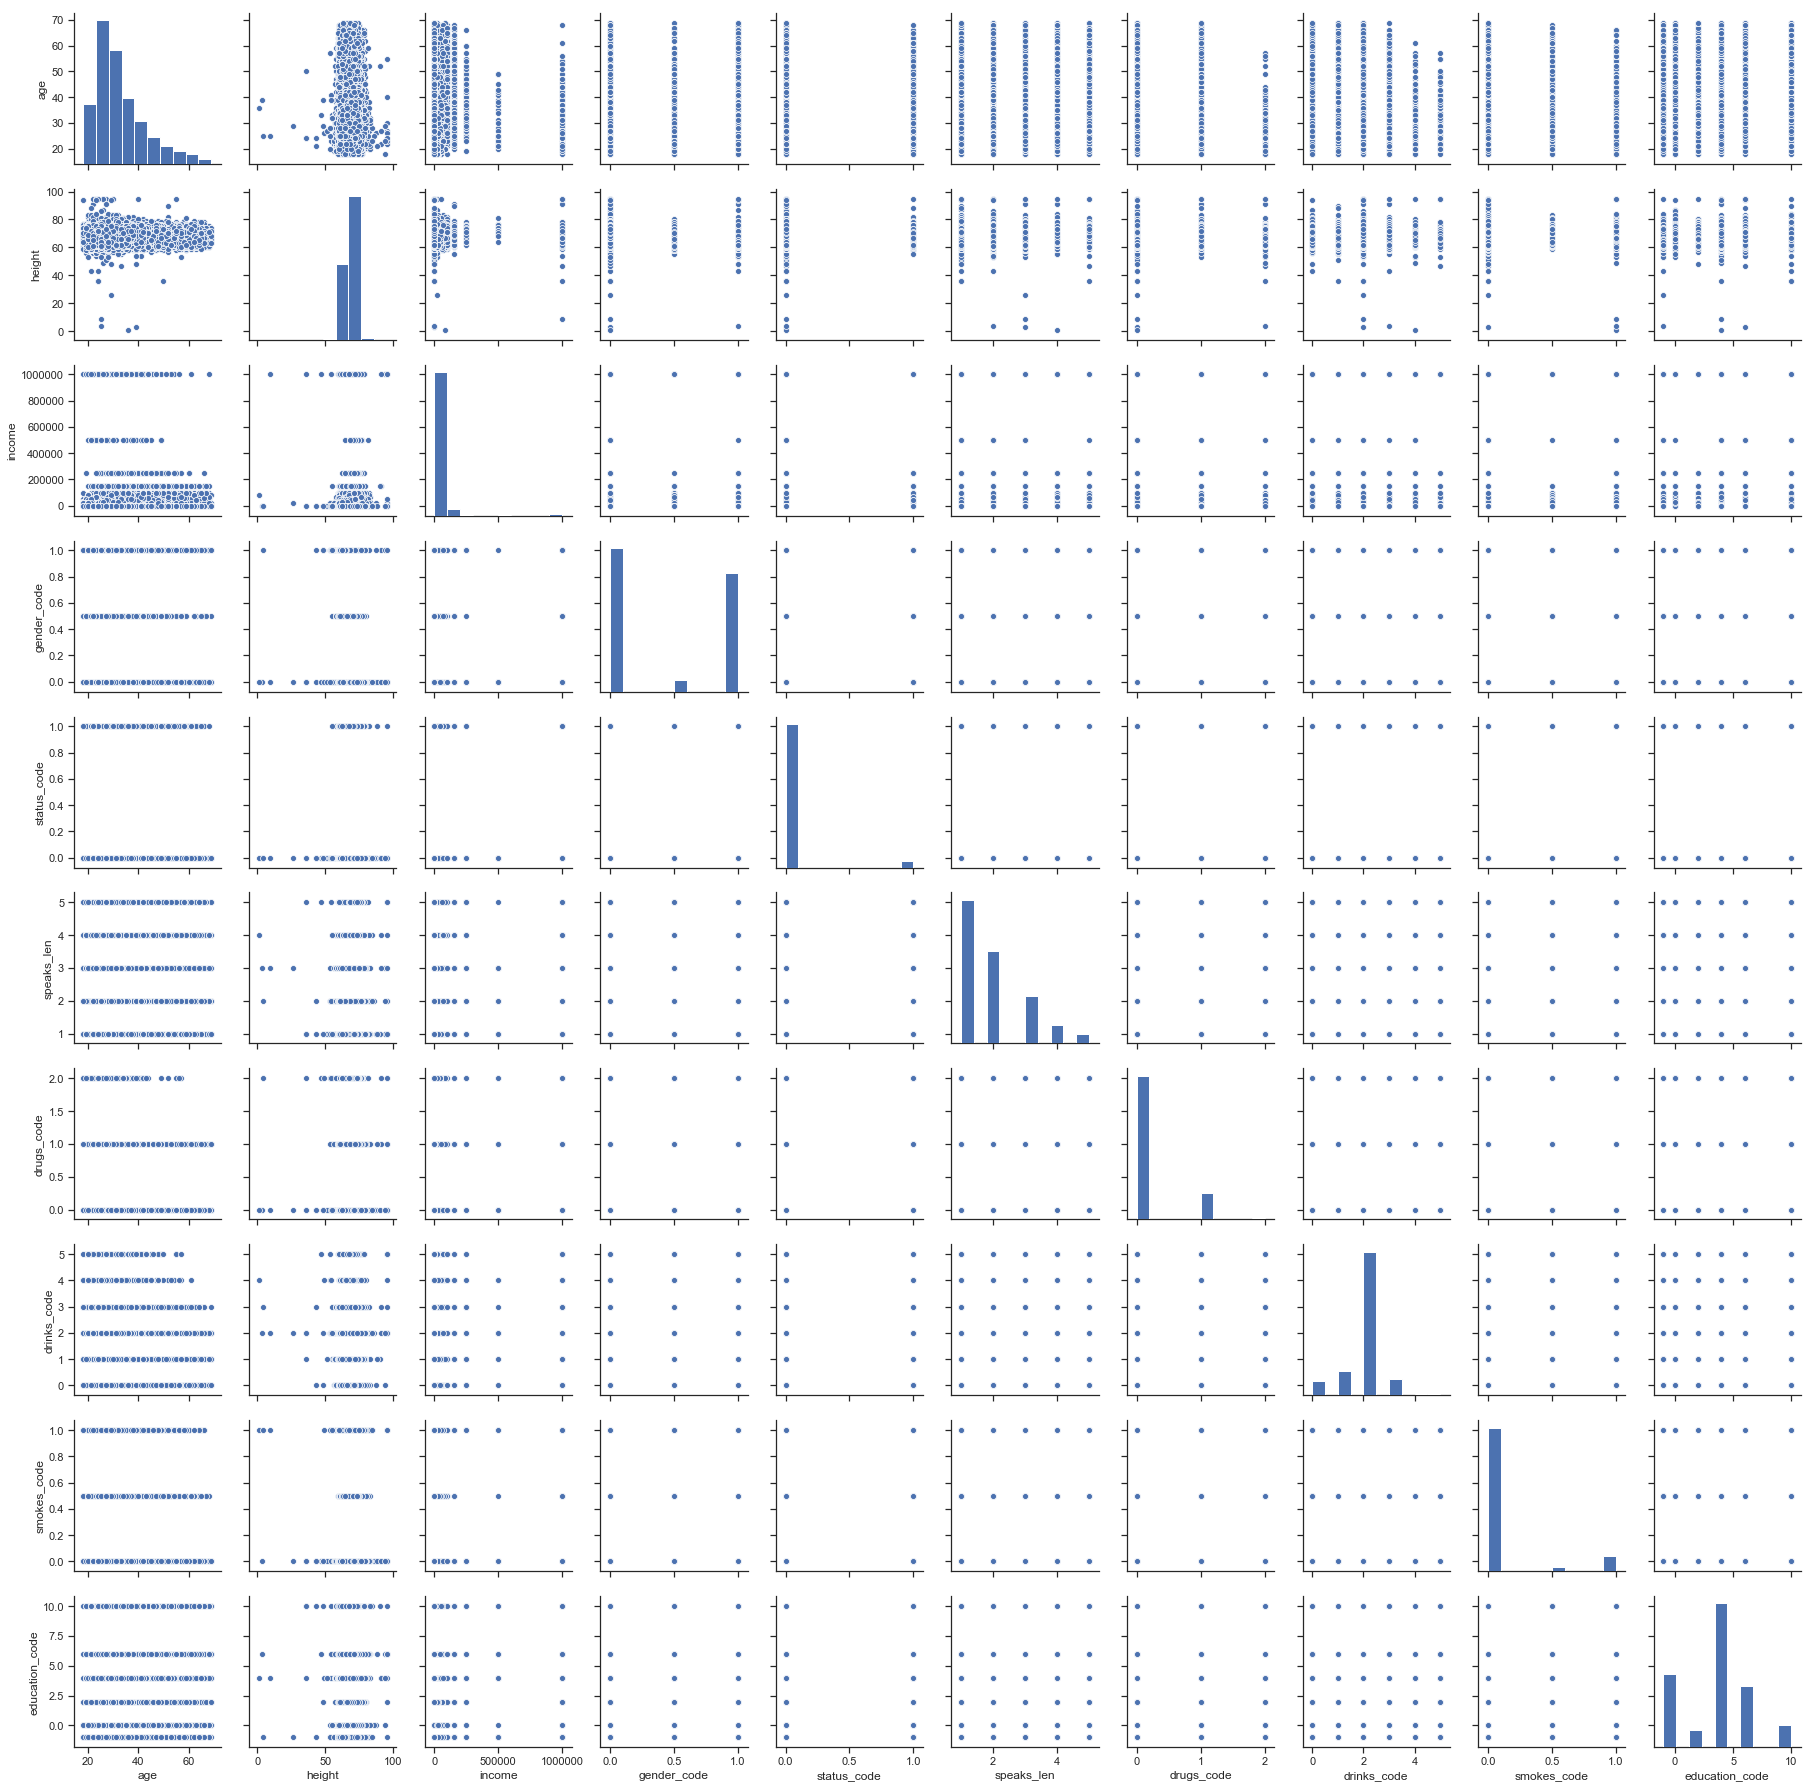

In [9]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)

# Preparing dataset for analyse
features = ['age', 'height', 'income', 'gender_code', 'status_code', 'speaks_len', 'drugs_code', 'drinks_code', 'smokes_code', 'education_code']
dataset = df[features].dropna()

print(len(dataset))
g = sns.pairplot(dataset, vars=features)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from collections import namedtuple

LinearEvaluation = namedtuple('LinearEvaluation', ['real_score', 'mean_squared_error', 'r2'])


def get_correlation_score(x, y):
    # Split 80% (training) / 20% (validation)
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)

    # Create multiple linear regression model
    mlr = LinearRegression()

    # Training
    mlr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = mlr.predict(x_test)

    return LinearEvaluation(
        mlr.score(x_train, y_train),
        mean_squared_error(y_test, y_pred),
        r2_score(y_test, y_pred))

In [17]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

def get_feature_correlation(df, first_feature, second_feature):
    dataset = df[[first_feature, second_feature]].dropna()

    x = dataset[[first_feature]]
    x_scaled = min_max_scaler.fit_transform(x)
    y = dataset[[second_feature]]

    return get_correlation_score(x_scaled, y)

def get_features_correlation(df, features, feature):
    dataset = df[features + [feature]].dropna()

    x = dataset[features]
    x_scaled = min_max_scaler.fit_transform(x)
    y = dataset[[feature]]

    return get_correlation_score(x_scaled, y)

In [18]:
def clean_dataset(df, features):
    dataset = df[features].dropna()
    return dataset[dataset.income > 0]

dataset = clean_dataset(df, ['age', 'income'])
print(get_feature_correlation(dataset, 'age', 'income'))

dataset = clean_dataset(df, ['education_code', 'income'])
print(get_feature_correlation(dataset, 'education_code', 'income'))

dataset = clean_dataset(df, ['age', 'education_code', 'income'])
print(get_features_correlation(dataset, ['age', 'education_code'], 'income'))

LinearEvaluation(real_score=1.2893057174778731e-05, mean_squared_error=40551054875.32619, r2=0.0001940218951941297)
LinearEvaluation(real_score=0.012194285283103068, mean_squared_error=39287104165.13057, r2=0.017308507450450317)
LinearEvaluation(real_score=0.015227149018885668, mean_squared_error=39266278536.23242, r2=0.01782942057907355)


D:\Applications\Conda\4.5.11\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
D:\Applications\Conda\4.5.11\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


10783 rows


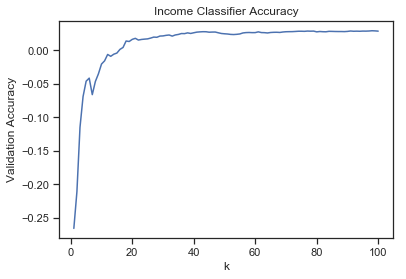

In [25]:
from sklearn.neighbors import KNeighborsRegressor

dataset = df[['age', 'education_code', 'income']].dropna()
dataset = dataset[dataset.income > 0].dropna()

x = dataset[['age', 'education_code']]
y = dataset[['income']]

print (len(dataset), 'rows')

# Extract learning and validation dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

k_list = range(1, 101)
accuracies = []
scores = []
for k in k_list:
    # Create a K-Neighbor Classifier
    regressor = KNeighborsRegressor (n_neighbors = k)

    # Train using training dataset
    regressor.fit(x_train, y_train)

    y_pred = regressor.predict(x_test)
    
    accuracies.append(LinearEvaluation(
        regressor.score(x_train, y_train),
        mean_squared_error(y_test, y_pred),
        r2_score(y_test, y_pred)))
    scores.append(regressor.score(x_train, y_train))

# Plot "k" vs "accuracy"
plt.plot(k_list, scores)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Income Classifier Accuracy')
plt.show()

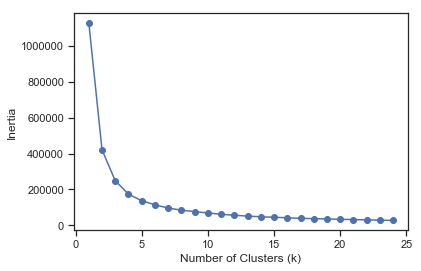

In [54]:
from sklearn.cluster import KMeans

samples = dataset[['age', 'education_code']].values

# Plot number of cluster vs intertia (elbow method)
num_clusters = list(range(1, 25))
inertias = []

for k in num_clusters:
  model = KMeans(n_clusters=k)
  model.fit(samples)
  inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.show()

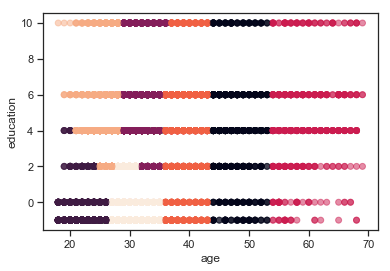

In [55]:
# Use KMeans() to create a model that finds 3 clusters
k = 7

model = KMeans(n_clusters = k)

# Use .fit() to fit the model to samples
model.fit(samples)

# Use .predict() to determine the labels of samples 
labels = model.predict(samples)

# Make a scatter plot of x and y and using labels to define the colors
x = samples[:, 0]
y = samples[:, 1]

plt.scatter(x, y, c=labels, alpha=0.5)

plt.xlabel('age')
plt.ylabel('education')

plt.show()

In [56]:
df = pd.DataFrame({'labels': labels, 'species': dataset.income.values})
ct = pd.crosstab(df['labels'], df['species'])
print (ct)

species  20000    30000    40000    50000    60000    70000    80000    \
labels                                                                   
0             70       55       54       96       65       87      122   
1           1370      208      113       57       39       26       36   
2            218      150      238      215      180      150      296   
3             52       41       44       61       39       45       97   
4            145      110      128      167      141      154      202   
5            521      252      217      213      161      154      228   
6            419      149      135       93       64       49       50   

species  100000   150000   250000   500000   1000000  
labels                                                
0            205       89       18        6       15  
1             18       10        6        8      106  
2            503      207       34        9      118  
3            105       43       11        0        7  
4  